## Predictive modeling of customer bookings


### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [43]:
import pandas as pd

In [44]:
df = pd.read_csv("C:/Users/prash/Desktop/Predicting customer behavior/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [46]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [47]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [48]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [49]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


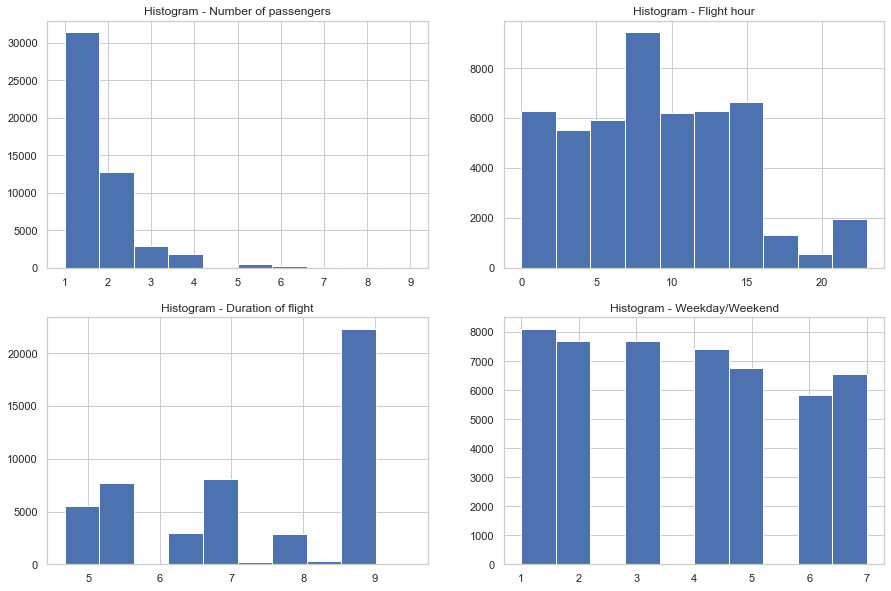

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(df['num_passengers'])
plt.title('Histogram - Number of passengers')

plt.subplot(2,2,2)
plt.hist(df['flight_hour'])
plt.title('Histogram - Flight hour')

plt.subplot(2,2,3)
plt.hist(df['flight_duration'])
plt.title('Histogram - Duration of flight')

plt.subplot(2,2,4)
plt.hist(df['flight_day'])
plt.title('Histogram - Weekday/Weekend')
plt.show()

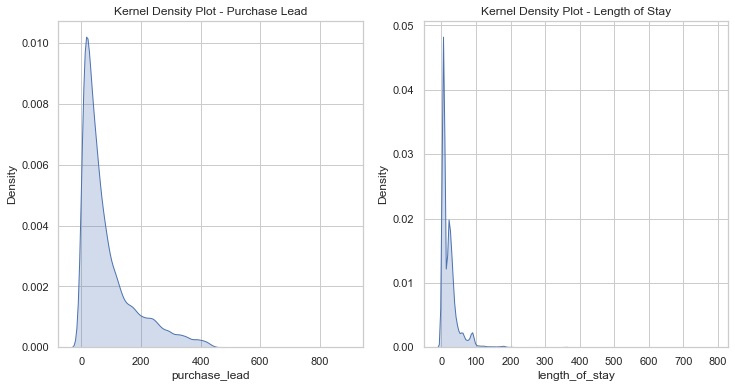

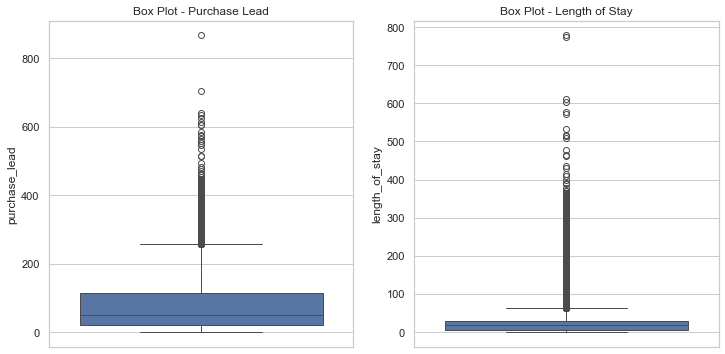

In [51]:
import seaborn as sns

sns.set(style="whitegrid")

# Kernel Density Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(df['purchase_lead'], fill=True)
plt.title('Kernel Density Plot - Purchase Lead')

plt.subplot(1, 2, 2)
sns.kdeplot(df['length_of_stay'], fill=True)
plt.title('Kernel Density Plot - Length of Stay')

plt.show()

# Box Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['purchase_lead'])
plt.title('Box Plot - Purchase Lead')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['length_of_stay'])
plt.title('Box Plot - Length of Stay')

plt.show()

In [52]:
df_dummies = pd.get_dummies(df['sales_channel'], prefix ='channel')
df_dummies = df_dummies.astype(int)
df = pd.concat([df, df_dummies], axis=1)
df = df.drop('sales_channel', axis=1)

In [53]:
dummies = pd.get_dummies(df['trip_type'], prefix = 'trip_type', drop_first=True)
dummies = dummies.astype(int)
df = pd.concat([df,dummies], axis = 1)
df = df.drop('trip_type', axis = 1)

In [54]:
df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,channel_Internet,channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,1,0,0,1
49996,1,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,1,0,0,1
49997,1,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,1,0,0,1
49998,1,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,1,0,0,1


C:\Users\prash\AppData\Local\Temp/ipykernel_8232/1119711931.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, ax=axes[i], palette = 'viridis')
C:\Users\prash\AppData\Local\Temp/ipykernel_8232/1119711931.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, ax=axes[i], palette = 'viridis')
C:\Users\prash\AppData\Local\Temp/ipykernel_8232/1119711931.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, ax=axes[i], palette = 'viridis')
C:\Users\prash\AppData\Local\Temp/ipykernel_82

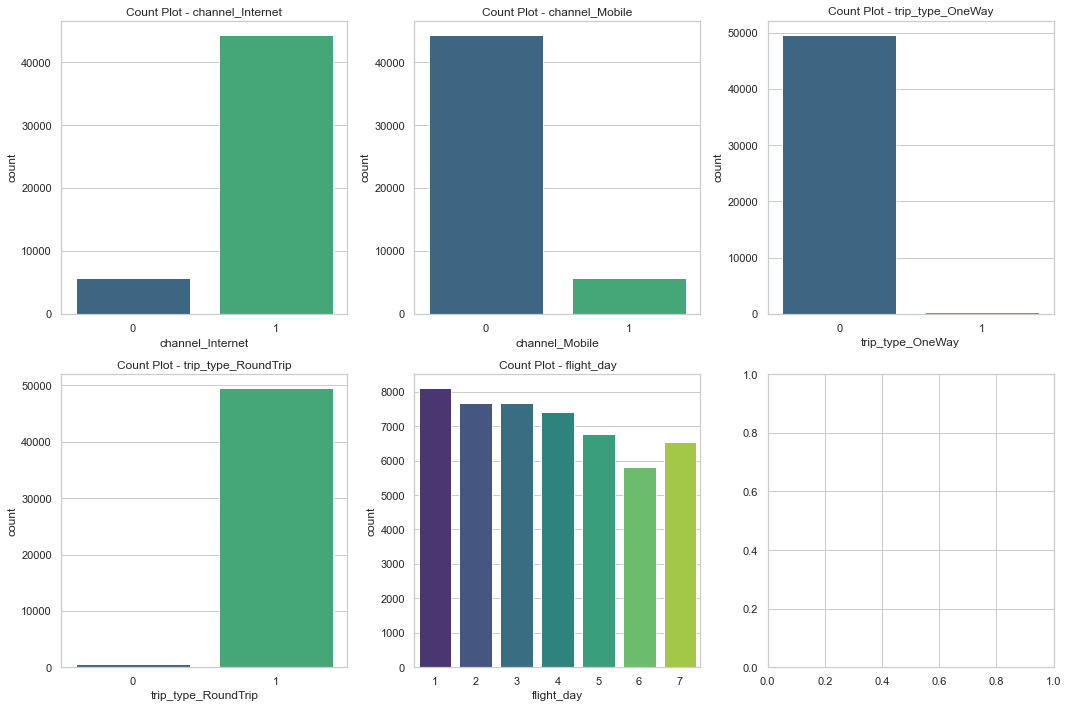

In [55]:

# Categorical columns
categorical_columns = ['channel_Internet','channel_Mobile','trip_type_OneWay','trip_type_RoundTrip', 'flight_day']

# Set the style
sns.set(style="whitegrid")

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot count plots for each categorical variable
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df, ax=axes[i], palette = 'viridis')
    axes[i].set_title(f'Count Plot - {column}')

# Adjust layout
plt.tight_layout()
plt.show()


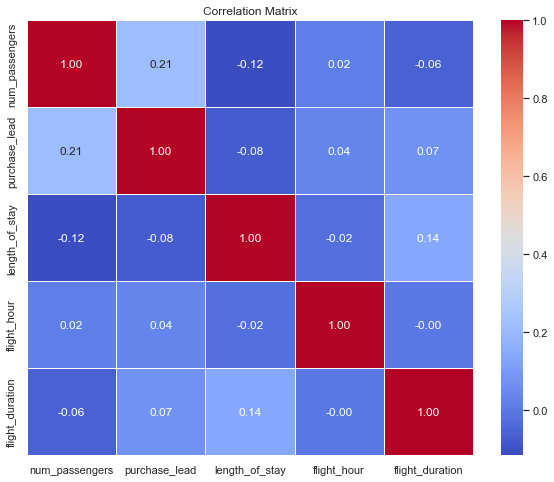

In [56]:
numerical_columns = ['num_passengers','purchase_lead','length_of_stay','flight_hour','flight_duration']

numerical_data = df[numerical_columns]
corr_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Matrix')
plt.show()

C:\Users\prash\AppData\Local\Temp/ipykernel_8232/288059585.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, ax=axes[i], palette="viridis")
C:\Users\prash\AppData\Local\Temp/ipykernel_8232/288059585.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, ax=axes[i], palette="viridis")
C:\Users\prash\AppData\Local\Temp/ipykernel_8232/288059585.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, ax=axes[i], palette="viridis")
C:\Users\prash\AppData\Local\Temp/ipykernel_8232/288059

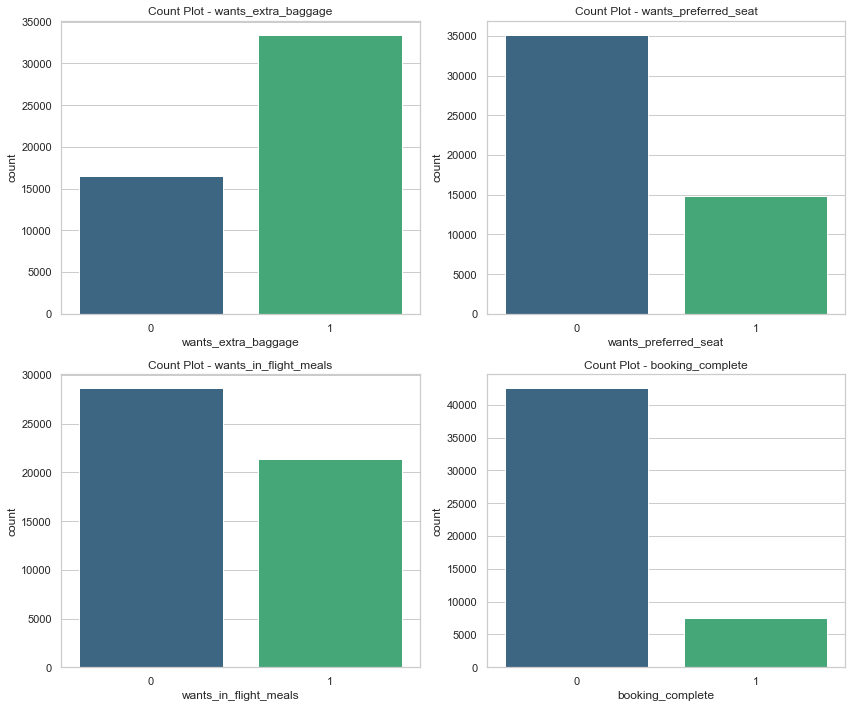

In [57]:
binary_variables = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']

# Set the style
sns.set(style="whitegrid")

# Create subplots for each binary variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot count plots for each binary variable
for i, column in enumerate(binary_variables):
    sns.countplot(x=column, data=df, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Count Plot - {column}')

# Adjust layout
plt.tight_layout()
plt.show()


In [58]:
df['weekend'] = df['flight_day'].apply(lambda x: 1 if x in [6,7] else 0)

In [59]:
df['booking_origin'].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

In [60]:
df = pd.get_dummies(df, columns=['booking_origin'], prefix='booking_origin')

In [61]:
one_hot_columns = [col for col in df.columns if 'booking_origin_' in col]

In [62]:
not_set_column = 'booking_origin_(not set)'

In [63]:
df[one_hot_columns] = df[one_hot_columns].map(lambda x: 1 if x>0 else 0)

In [64]:
# Treat 'booking_origin_(not set)' as a binary indicator
df['booking_origin_not_set'] = df[not_set_column]
df['booking_origin_not_set'] = df['booking_origin_not_set'].apply(lambda x: 1 if x > 0 else 0)

C:\Users\prash\AppData\Local\Temp/ipykernel_8232/2675284979.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['booking_origin_not_set'] = df[not_set_column]


In [65]:
# Drop the original 'booking_origin_(not set)' column
df.drop(not_set_column, axis=1, inplace=True)

In [66]:
df.drop('route', axis=1, inplace=True)

In [67]:
df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam,booking_origin_not_set
0,2,262,19,7,6,1,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,6,0,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,3,1,1,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,6,0,0,1,5.52,0,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,3,1,0,1,5.52,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,0,...,0,0,0,0,0,0,0,0,0,0
49996,1,111,6,4,7,0,0,0,5.62,0,...,0,0,0,0,0,0,0,0,0,0
49997,1,24,6,22,6,0,0,1,5.62,0,...,0,0,0,0,0,0,0,0,0,0
49998,1,15,6,11,1,1,0,1,5.62,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,make_scorer, precision_score, recall_score, f1_score


In [69]:
# Step 4: Split the data into features (X) and the target variable (y)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

In [70]:
df['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [71]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 5: Train the model
random_forest_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = random_forest_model.predict(X_test)

# Step 7: Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.8514

Confusion Matrix:
[[8358  162]
 [1324  156]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.49      0.11      0.17      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.54      0.55     10000
weighted avg       0.81      0.85      0.81     10000



In [72]:
# Extract feature importances
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(feature_importance_df)

                      Feature  Importance
1               purchase_lead    0.228433
3                 flight_hour    0.169890
2              length_of_stay    0.153939
8             flight_duration    0.096937
4                  flight_day    0.085364
..                        ...         ...
26    booking_origin_Bulgaria    0.000000
80      booking_origin_Panama    0.000000
58  booking_origin_Kazakhstan    0.000000
21     booking_origin_Belarus    0.000000
94    booking_origin_Slovakia    0.000000

[118 rows x 2 columns]


In [108]:
feature_importance_df['Feature'].head(15)

1                   purchase_lead
3                     flight_hour
2                  length_of_stay
8                 flight_duration
4                      flight_day
0                  num_passengers
64        booking_origin_Malaysia
17       booking_origin_Australia
7           wants_in_flight_meals
6            wants_preferred_seat
5             wants_extra_baggage
13                        weekend
50       booking_origin_Indonesia
98     booking_origin_South Korea
106       booking_origin_Thailand
Name: Feature, dtype: object

In [95]:
from sklearn.model_selection import cross_validate

In [96]:
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Use StratifiedKFold for classification tasks
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cross_val_results = cross_validate(random_forest_model, X, y, cv=stratified_kfold, scoring=scoring_metrics)


In [97]:
cross_val_results

{'fit_time': array([6.04295778, 6.10763454, 6.02717471, 6.03646564, 6.11625695]),
 'score_time': array([0.18834567, 0.18993545, 0.18937206, 0.18860459, 0.19909453]),
 'test_accuracy': array([0.8503, 0.8496, 0.8514, 0.8511, 0.8514]),
 'test_precision': array([0.496875  , 0.48598131, 0.5152439 , 0.50964187, 0.51470588]),
 'test_recall': array([0.10635452, 0.10434783, 0.11296791, 0.1236631 , 0.11697861]),
 'test_f1': array([0.17520661, 0.17180617, 0.18530702, 0.19903174, 0.19063181])}

In [99]:
for metric in scoring_metrics:
    print(f"{metric.capitalize()}: {cross_val_results[f'test_{metric}'].mean():.4f} (±{cross_val_results[f'test_{metric}'].std():.4f})")

Accuracy: 0.8508 (±0.0007)
Precision: 0.5045 (±0.0114)
Recall: 0.1129 (±0.0070)
F1: 0.1844 (±0.0100)


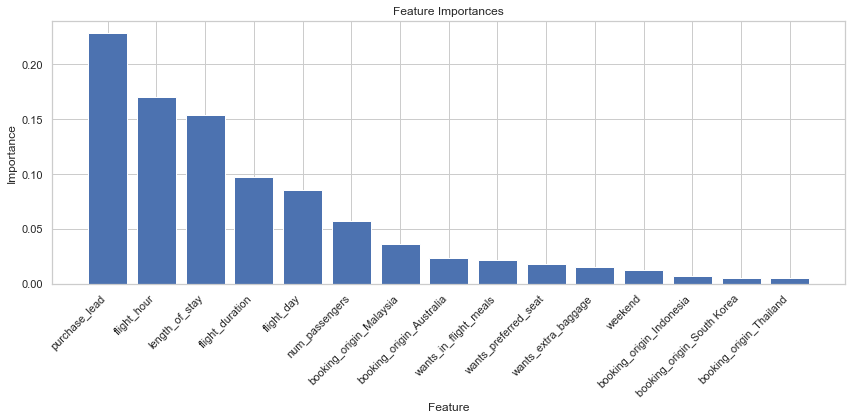

In [109]:
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'].head(15), feature_importance_df['Importance'].head(15))
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [110]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use StratifiedKFold for classification tasks
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(random_forest_model, param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters on the entire dataset
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X, y)


RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

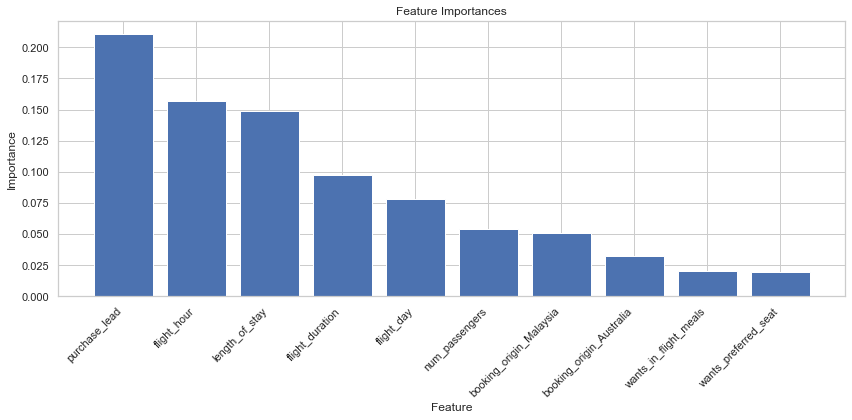

In [115]:
# Extract feature importances
feature_importances_final = final_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_final = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_final})

# Sort the DataFrame by importance in descending order
feature_importance_final = feature_importance_final.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(feature_importance_final['Feature'].head(10), feature_importance_final['Importance'].head(10))
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()